In [2]:
import pandas as pd
%pip install matplotlib
%pip install geopandas
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Character
Carichiamo i dati dei file CSV relativi ai characters e controlliamo che il caricamento sia avvenuto correttamente.

In [2]:
characterAW_df = pd.read_csv('character_anime_works.csv')
characterAW_df = characterAW_df.drop(columns=['character_name'])
characterAW_df.head()
characterNN_df = pd.read_csv('character_nicknames.csv')
characterNN_df.head()
character_df = pd.read_csv('characters.csv')
character_df = character_df.drop(columns=['url', 'name_kanji', 'image', 'about'])
character_df.head()
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
character_df = pd.merge(character_df, characterAW_df, on='character_mal_id', how='left')
character_df = pd.merge(character_df, characterNN_df, on='character_mal_id', how='left')
character_df.drop_duplicates(subset=['character_mal_id'], inplace=True)
character_df.head()

,character_mal_id,name,favorites,anime_mal_id,role,nickname
0,280386.0,Envi Mel Champagne,0.0,59846.0,Supporting,NaN
1,280354.0,Eleven,0.0,60071.0,Supporting,NaN
2,280353.0,Stud,0.0,60071.0,Supporting,NaN
3,280352.0,Judge,0.0,60071.0,Supporting,NaN
4,280339.0,Eiji Kurokawa,0.0,60531.0,Supporting,NaN


Grazie ai dati contenuti in questi file, che abbiamo unito per dare più contesto e profondità ai dati, possiamo ricavare informazioni interessanti sui personaggi del mondo anime.
Come prima domanda abbiamo pensato di chiederci quali sono i 5 personaggi più amati dal pubblico. 

In [3]:
top5 = character_df.nlargest(5, 'favorites')
top5

,character_mal_id,name,favorites,anime_mal_id,role,nickname
321863,417.0,Lelouch Lamperouge,175632.0,56835.0,Supporting,Lelouch vi Britannia
324813,40.0,Luffy Monkey D.,145750.0,52139.0,Main,Mugiwara
230905,45627.0,Levi,144452.0,16498.0,Supporting,NaN
324292,71.0,L Lawliet,129333.0,1535.0,Main,Ryuga Hideki
324443,62.0,Zoro Roronoa,114319.0,52139.0,Main,Pirate Hunter


Vediamo nella tabella contenente i dati estratti che il personaggio più amato è "Lelouch Lamperouge" del quale sappiamo il suo nick name, per quanti utenti è un personaggio preferito, in quale anime è presente e dato più interessante a nostro parere possiamo vedere che è un personaggio secondario.
Questa però era solo una curiosità che ci è servita per prendere confidenza con i dati che stiamo analizzando, la prima domanda più interessante è la seguente: negli anime quanti protagonisti ci sono? e quanti sono in proporzione ai personaggi di supporto?

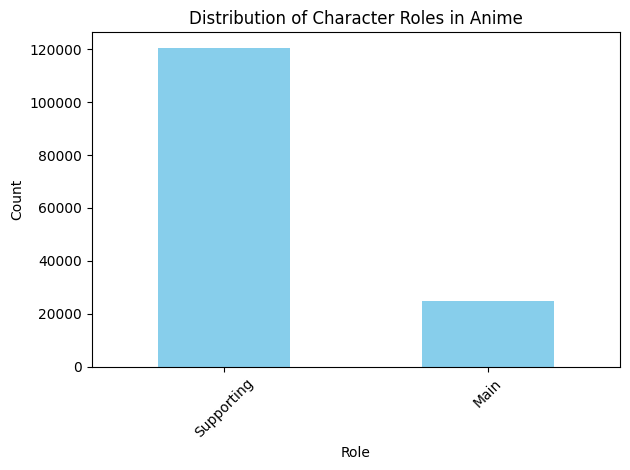

In [4]:
character_df['role'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come possiamo vedere i personaggi secondari sono tantissimi in confronto ai protagonisti, questo però è un dato perfettamente logico, ci serve unicamente per chiederci una nuova domanda, prettamente per curiosita.
Nel mondo anime tra i 100 personaggi più amati dal pubblico ci sono più protagonisti o personaggi secondari?

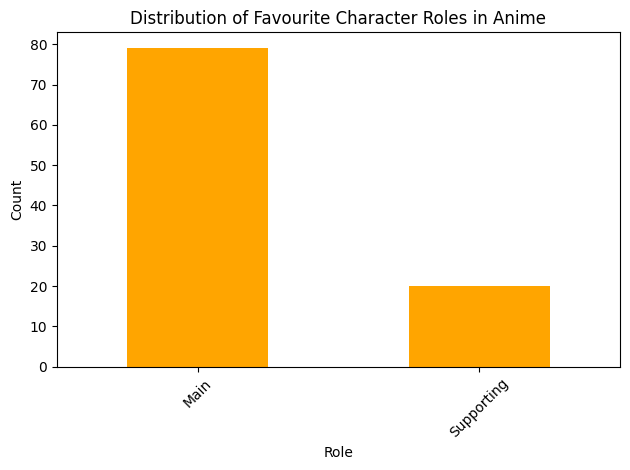

In [5]:
top100 = character_df.nlargest(100, 'favorites')
top100['role'].value_counts().plot(kind='bar', color='orange')

plt.title('Distribution of Favourite Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come potevamo aspettarci se prendiamo a campione i 100 personaggi più amati del mondo anime sono per circa l'80% protagonisti.
Questa breve analisi sui dati non ci lascia soropresi in quanto rispecchia le aspettative che avevamo prima di approcciare i dati nel concreto; i personaggi secondari sono ovviamente tantissimi rispetto ai protagonisti ma sono gli utlimo a essere i più amati dal pubblico.

# Details
Adesso che abbiamo visto qualche curiosità sui personaggi, perchè non farci anche delle domande sugli anime in cui appaiono questi personaggi?
Iniziamo caricando i dati dei file CSV relativi agli anime e controlliamo che il caricamento sia avvenuto correttamente.

In [ ]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df.head()

In [42]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df = details_df.drop(columns=['url', 'title_japanese', 'image_url', 'synopsis', 'members', 'themes', 'demographics', 'source','rating','producers', 'explicit_genres', 'licensors', 'streaming'])
details_df['start_date'] = pd.to_datetime(details_df['start_date'])
details_df.drop_duplicates(subset=['mal_id'], inplace=True)
details_df.head()

,mal_id,title,type,status,score,scored_by,start_date,end_date,rank,popularity,favorites,genres,studios,episodes,season,year
0,59356,-Socket-,Movie,Finished Airing,NaN,NaN,2010-01-01 00:00:00+00:00,NaN,17086.0,22507,0,['Comedy'],[],1.0,NaN,NaN
1,56036,......,Music,Finished Airing,6.53,503.0,2023-06-11 00:00:00+00:00,NaN,NaN,15004,2,"['Horror', 'Supernatural']",['Flat Studio'],1.0,NaN,NaN
2,2928,.hack//G.U. Returner,OVA,Finished Airing,6.65,9745.0,2007-01-18 00:00:00+00:00,NaN,6366.0,5056,31,"['Adventure', 'Drama', 'Fantasy']",['Bee Train'],1.0,NaN,NaN
3,3269,.hack//G.U. Trilogy,Movie,Finished Airing,7.06,15373.0,2007-12-22 00:00:00+00:00,NaN,4194.0,4215,104,"['Action', 'Fantasy']",['CyberConnect2'],1.0,NaN,NaN
4,4469,.hack//G.U. Trilogy: Parody Mode,Special,Finished Airing,6.35,4317.0,2008-03-25 00:00:00+00:00,NaN,8182.0,6696,10,"['Comedy', 'Fantasy', 'Sci-Fi']",[],1.0,NaN,NaN


E' interessante capire quali generi sono i più prodotti.

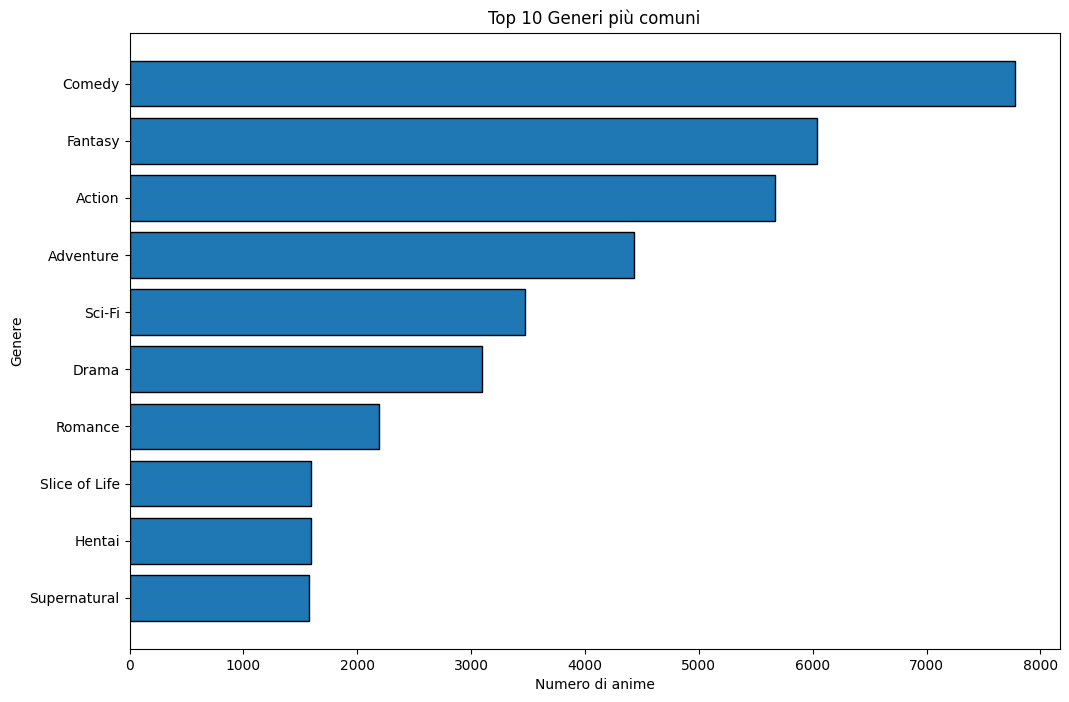

In [43]:
# Top 10 generi più comuni
from collections import Counter

# Espandere la colonna genres (assumendo sia separata da virgole)
all_genres = []
for gen in details_df['genres'].dropna():
    genres_list = gen.split(', ')
    for g in genres_list:
        cleaned = g.strip("[]'\"")  # Rimuovi parentesi quadre e virgolette
        if cleaned:  # Salta generi vuoti
            all_genres.append(cleaned)

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

# Grafico
genres, counts = zip(*top_genres)
plt.figure(figsize=(12, 8))
plt.barh(genres, counts, edgecolor='black')
plt.title('Top 10 Generi più comuni')
plt.xlabel('Numero di anime')
plt.ylabel('Genere')
plt.gca().invert_yaxis()  # Per avere il top al top
plt.show()

Possiamo vedere come la commedia e il fantasy siano i generi più presenti.
Quindi adesso possiamo chiederci, ma i primi 10 anime più apprezzati dal pubblico combaciano con i generi più prodotti.

In [48]:
top_ranked = details_df.sort_values('favorites', ascending=False).head(10)[['title', 'favorites', 'rank']]
top_ranked.reset_index(drop=True, inplace=True)
top_ranked.index = top_ranked.index + 1

top_ranked.style \
    .format({'rank': '{:.0f}'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

,title,favorites,rank
1,One Piece,243358,55
2,Fullmetal Alchemist: Brotherhood,236754,2
3,Hunter x Hunter (2011),223927,7
4,Steins;Gate,198245,3
5,Shingeki no Kyojin,183305,118
6,Death Note,181989,96
7,Naruto: Shippuuden,118013,320
8,Code Geass: Hangyaku no Lelouch,114139,64
9,Shinseiki Evangelion,114076,247
10,Kimi no Na wa.,94186,32


Da questa tabella possiamo vedere la top10 degni anime favoriti dal pubblico. Però si può anche notare come i più amati non sono sempre nel ranking più alto, ovvero quelli con lo score maggiore (es. Naruto).

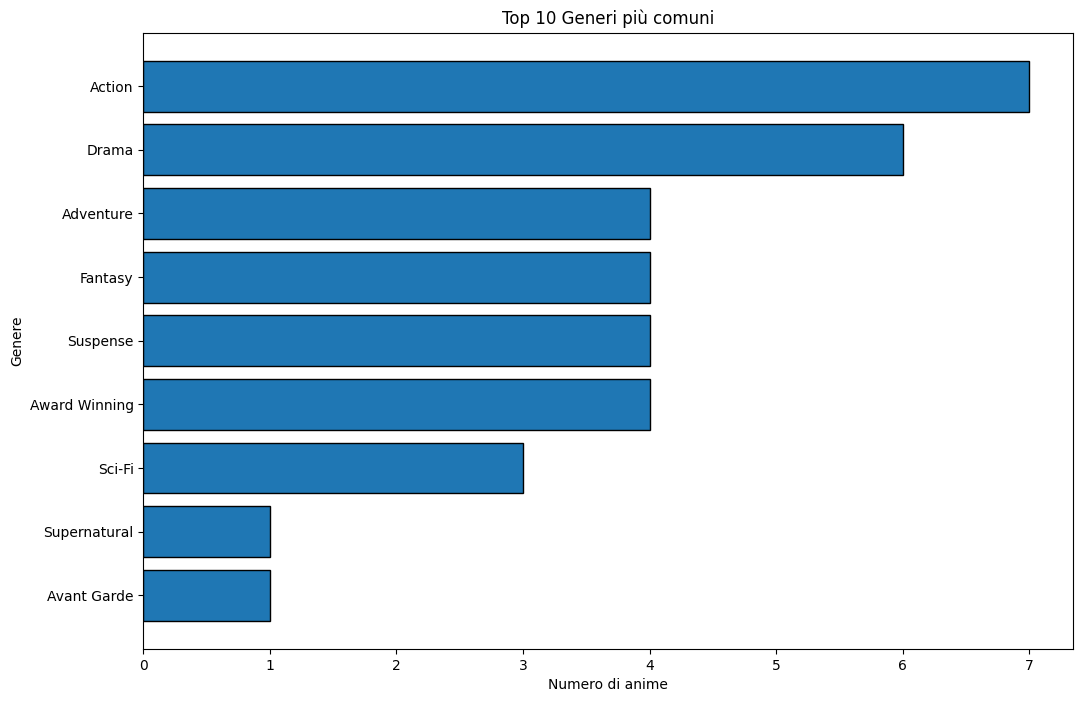

In [45]:
all_genres = []
for gen in top10['genres'].dropna():
    genres_list = gen.split(', ')
    for g in genres_list:
        cleaned = g.strip("[]'\"")  # Rimuovi parentesi quadre e virgolette
        if cleaned:  # Salta generi vuoti
            all_genres.append(cleaned)

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

# Grafico
genres, counts = zip(*top_genres)
plt.figure(figsize=(12, 8))
plt.barh(genres, counts, edgecolor='black')
plt.title('Top 10 Generi più comuni')
plt.xlabel('Numero di anime')
plt.ylabel('Genere')
plt.gca().invert_yaxis()  # Per avere il top al top
plt.show()

Si può notare una cosa molto interessante, il genere commedy non è presente tra i top10 anime preferiti dal pubblico.
Ora una domanda interessante è capire se sono principalmente filf, serie TV, OVA, special ecc...

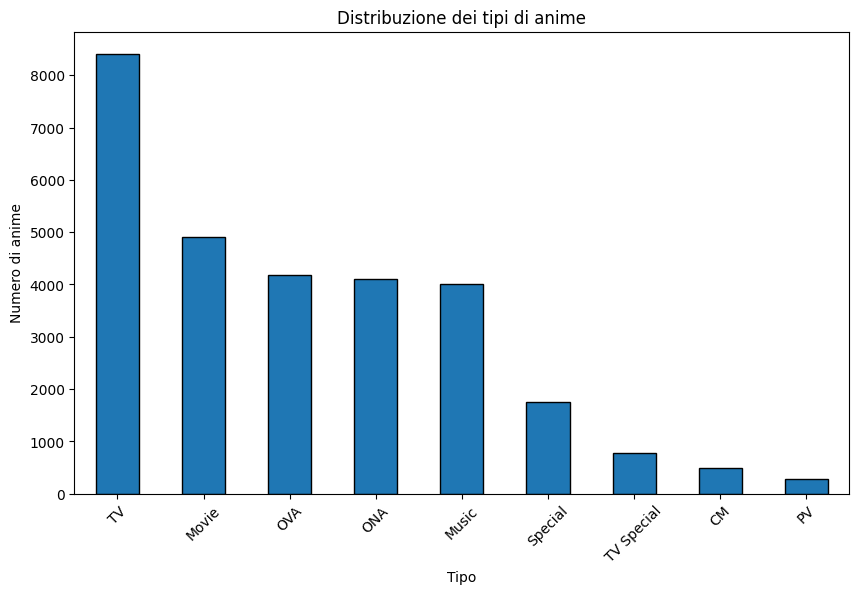

In [37]:
# Distribuzione dei tipi di anime
plt.figure(figsize=(10, 6))
details_df['type'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribuzione dei tipi di anime')
plt.xlabel('Tipo')
plt.ylabel('Numero di anime')
plt.xticks(rotation=45)
plt.show()

Possiamo notare come le serie TV siano le più prodotte con un margine abbastanza considerevole, seguito dai film, OVA ecc. che sono abbastanza simili.

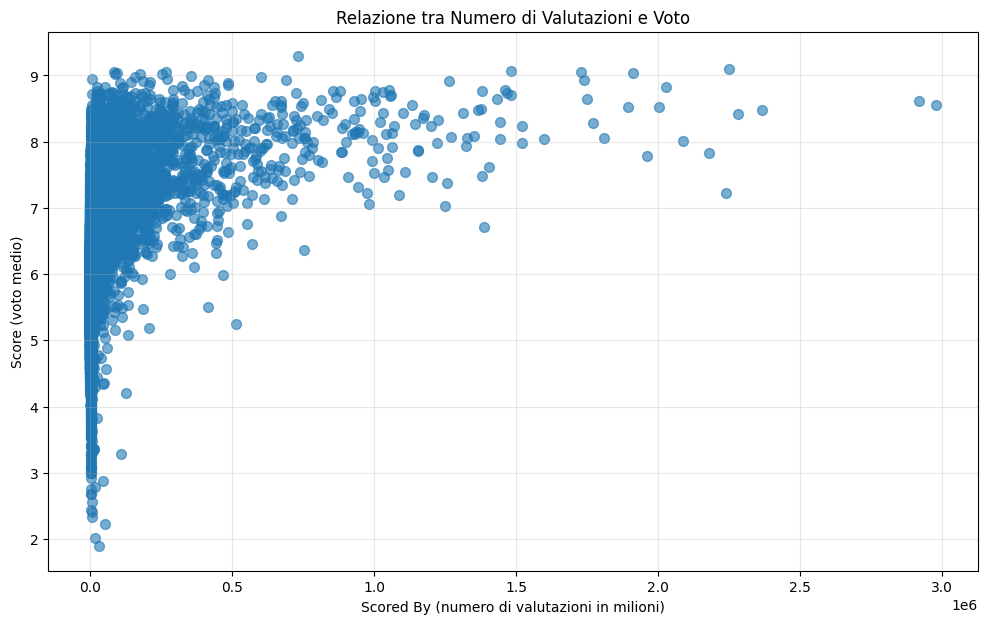

In [40]:
plt.figure(figsize=(12, 7))
plt.scatter(details_df['scored_by'], details_df['score'], alpha=0.6, s=50)
plt.xlabel('Scored By (numero di valutazioni in milioni)')
plt.ylabel('Score (voto medio)')
plt.title('Relazione tra Numero di Valutazioni e Voto')
plt.grid(True, alpha=0.3)
plt.show()

Con questo grafico possiamo notare che gli anime con uno score più alto sono anche tra i più votati.

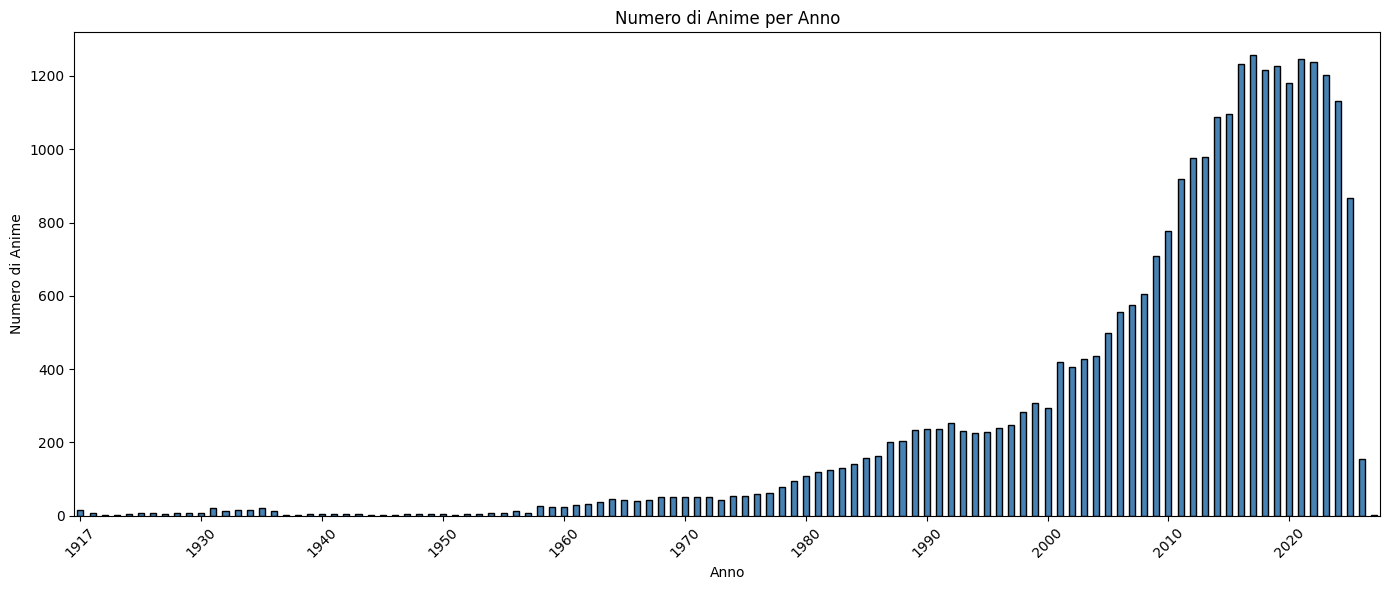

In [57]:
anime_per_anno = details_df.groupby(details_df['start_date'].dt.year).size()
plt.figure(figsize=(14, 6))
anime_per_anno.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Numero di Anime per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Anime')
years = anime_per_anno.index.tolist()
plt.xticks(range(0, len(years), 10), [str(int(years[i])) for i in range(0, len(years), 10)], rotation=45)
plt.tight_layout()
plt.show()

Da questo grafico possiamo notare come il periodi d'oro i valori sono crescuti in maniera esponeziale tra il 2010 e il 2020.
Visto che abbiamo parlato di anni perchè non chiederci in quale stagione vengono prodotti più anime.

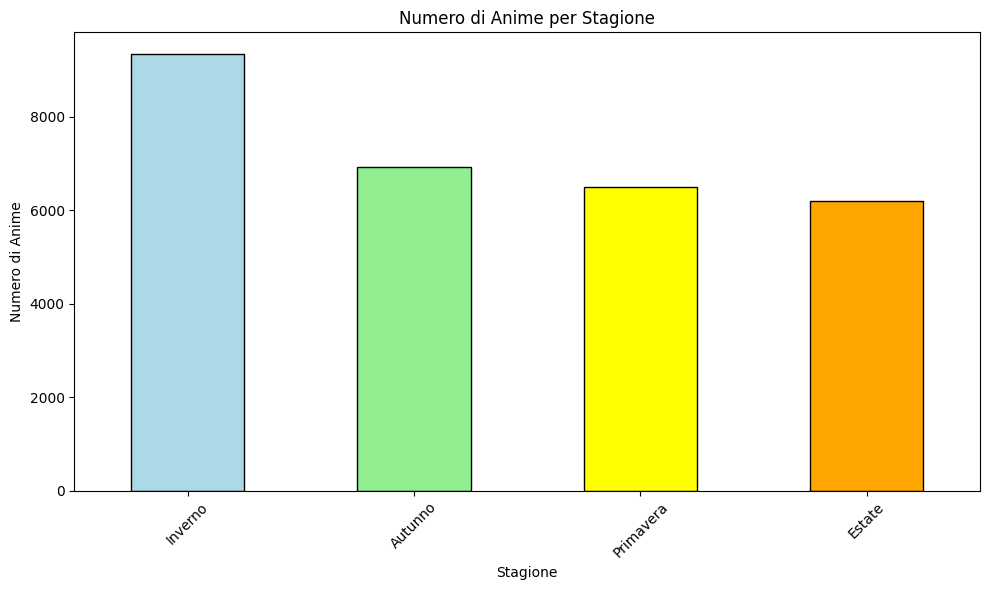

In [58]:
# Creare una colonna stagione basata sul mese
def get_season(month):
    if month in [12, 1, 2]:
        return 'Inverno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    else:
        return 'Autunno'

details_df['season'] = details_df['start_date'].dt.month.apply(get_season)

# Contare gli anime per stagione
season_counts = details_df['season'].value_counts()

# Grafico
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'yellow', 'orange'], edgecolor='black')
plt.title('Numero di Anime per Stagione')
plt.xlabel('Stagione')
plt.ylabel('Numero di Anime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si può notare come in inverno sono stati fatti uscire più anime e in estate meno, ha perfettemante senso considerando che in estate...

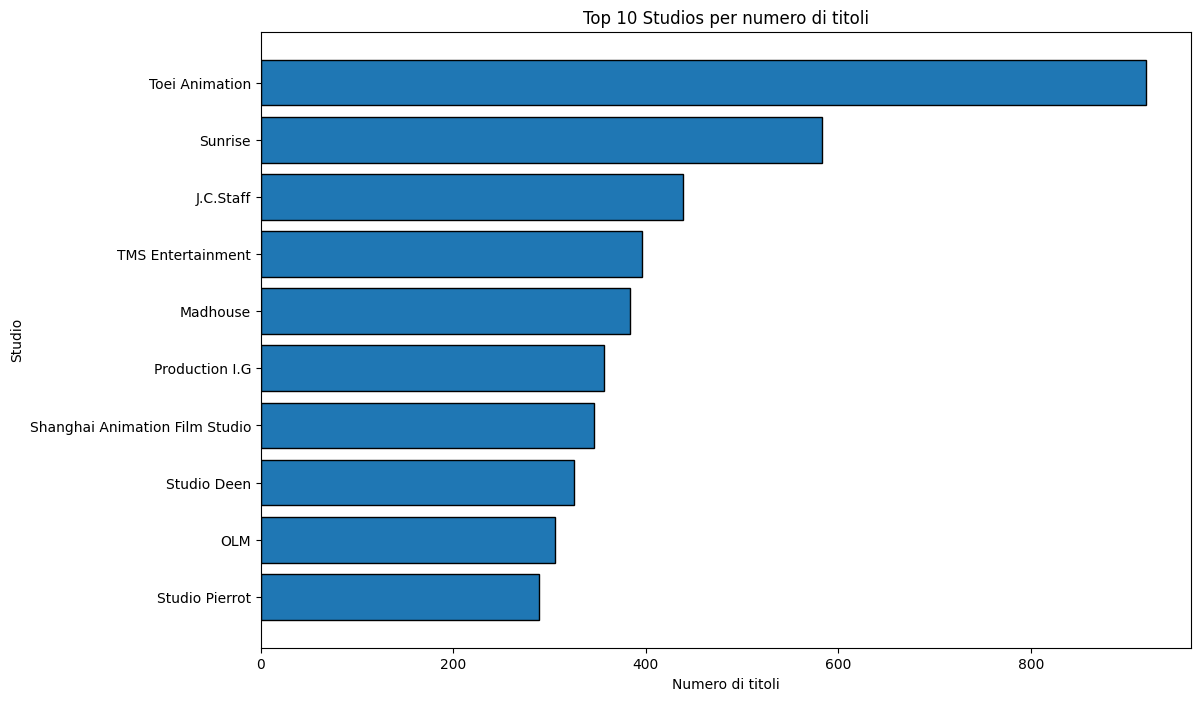

In [71]:
# Top 10 studios per numero di titoli
from collections import Counter
all_studios = []
for studios in details_df['studios'].dropna():
    studios_list = studios.split(', ')
    for s in studios_list:
        cleaned = s.strip("[]'\"")  # Rimuovi parentesi quadre e virgolette
        if cleaned:  # Salta studios vuoti
            all_studios.append(cleaned)

studios_counts = Counter(all_studios)
top_studios = studios_counts.most_common(10)

# Grafico
studios, counts = zip(*top_studios)
plt.figure(figsize=(12, 8))
plt.barh(studios, counts, edgecolor='black')
plt.title('Top 10 Studios per numero di titoli')
plt.xlabel('Numero di titoli')
plt.ylabel('Studio')
plt.gca().invert_yaxis()  # Per avere il top al top
plt.show()

possiavìmo vedere come lo studio che ha prodotto più titoli sia "Toei Animation" ed infatti è un famosissimo studio presente in giappone (patria degli naime).

# Favs
Analizziamo adesso il file favs.csv nel quale sono segnati i dati per ogni utente.
Secondo me è inutile analizzare favs (per lo meno da solo) perchè ci dice per ogni utente la sua libreria dei preferiti.